In [109]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset
df = pd.read_csv("Chocolate Sales.csv")

#Quick overview of dataset

#df.describe()
#df.head(10)
df.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [110]:
# Checking for missing values 
print(df.isnull().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [111]:
#  Converting the 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")

In [112]:
# Clean the 'Amount' column \
df["Amount"] = df["Amount"].astype(str).replace(r"[^\d.]", "", regex=True).astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


# %% [markdown]
# I wanted to identify which chocolates sell the most units to spot popular trends.

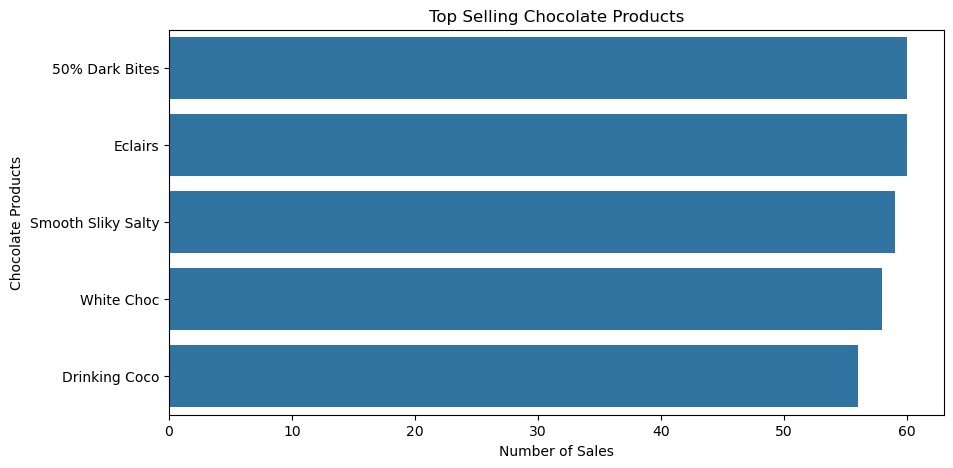

In [114]:
#Top Selling Chocolate Products 
top_chocolates = df["Product"].value_counts().head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_chocolates.values, y=top_chocolates.index)
plt.xlabel("Number of Sales")
plt.ylabel("Chocolate Products")
plt.title("Top Selling Chocolate Products")
plt.show()

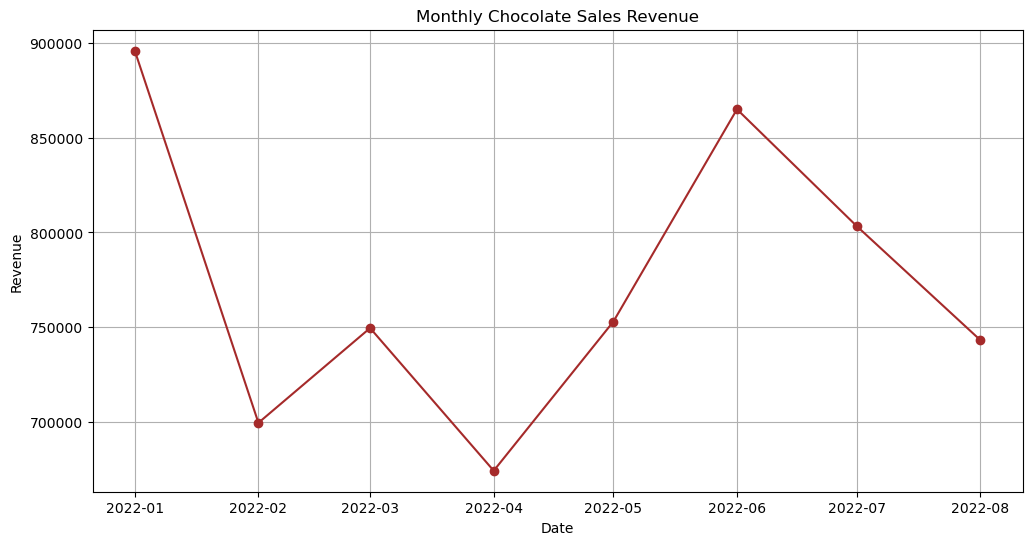

In [115]:
# Revenue for Chocolate Sales per Month

# Ensuring 'Date' is in datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")

# Group by date(months)
monthly_sales = df.groupby(df["Date"].dt.to_period("M")).agg({"Amount": "sum", "Boxes Shipped": "sum"})

# Reset the index back into a regular column
monthly_sales = monthly_sales.reset_index()

# Converting 'Date' from Period to Timestamp for easier plotting
monthly_sales["Date"] = monthly_sales["Date"].dt.to_timestamp()

#Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["Date"], monthly_sales["Amount"], marker="o", color="brown")
plt.title("Monthly Chocolate Sales Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

In [116]:
monthly_sales.head()

,Date,Amount,Boxes Shipped
0,2022-01-01,896105.0,27535
1,2022-02-01,699377.0,18015
2,2022-03-01,749483.0,19561
3,2022-04-01,674051.0,21003
4,2022-05-01,752892.0,21856


In [117]:
# **What country buys the most chocolate?**
# Australia, UK, and India are the top 3 countries with the highest chocolate sales.

df.groupby(['Country'])['Amount'].sum().sort_values(ascending = False)

Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

In [118]:
# **USA chocolate preferances:**
# The chocolate generating the most revenue in the USA is Raspberry Choco and the product generating the least amount of revenue is 70% Dark Bites

chocolate_sales_by_country = df.groupby(['Country', 'Product'])['Amount'].sum().reset_index()
USA_data = chocolate_sales_by_country[chocolate_sales_by_country['Country'] == 'USA']
USA_data_sorted = USA_data.sort_values(by='Amount', ascending=False)
print(USA_data_sorted)

    Country               Product   Amount
128     USA       Raspberry Choco  83524.0
122     USA    Manuka Honey Choco  67732.0
131     USA            White Choc  67221.0
110     USA        50% Dark Bites  57442.0
112     USA         85% Dark Bars  57197.0
126     USA   Organic Choco Syrup  51191.0
125     USA          Orange Choco  49042.0
115     USA          Almond Choco  48650.0
121     USA      Fruit & Nut Bars  48377.0
123     USA             Milk Bars  48251.0
113     USA       99% Dark & Pure  47894.0
129     USA    Smooth Sliky Salty  45493.0
120     USA               Eclairs  45192.0
114     USA           After Nines  42588.0
116     USA   Baker's Choco Chips  42420.0
118     USA  Choco Coated Almonds  41741.0
119     USA         Drinking Coco  38059.0
117     USA  Caramel Stuffed Bars  37590.0
124     USA       Mint Chip Choco  36323.0
127     USA   Peanut Butter Cubes  33628.0
130     USA   Spicy Special Slims  25214.0
111     USA        70% Dark Bites  20580.0


In [127]:
# %% [markdown]
# **Do Countries Prefer Specific Chocolates?**
# I used a heat map to compare product preferences across regions.

# Australia's chocolate preference is 50% dark bites, however, the USA prefers Raspberry Choco.
# White chocolate is highly favored in the USA and UK but not highly favored in India.

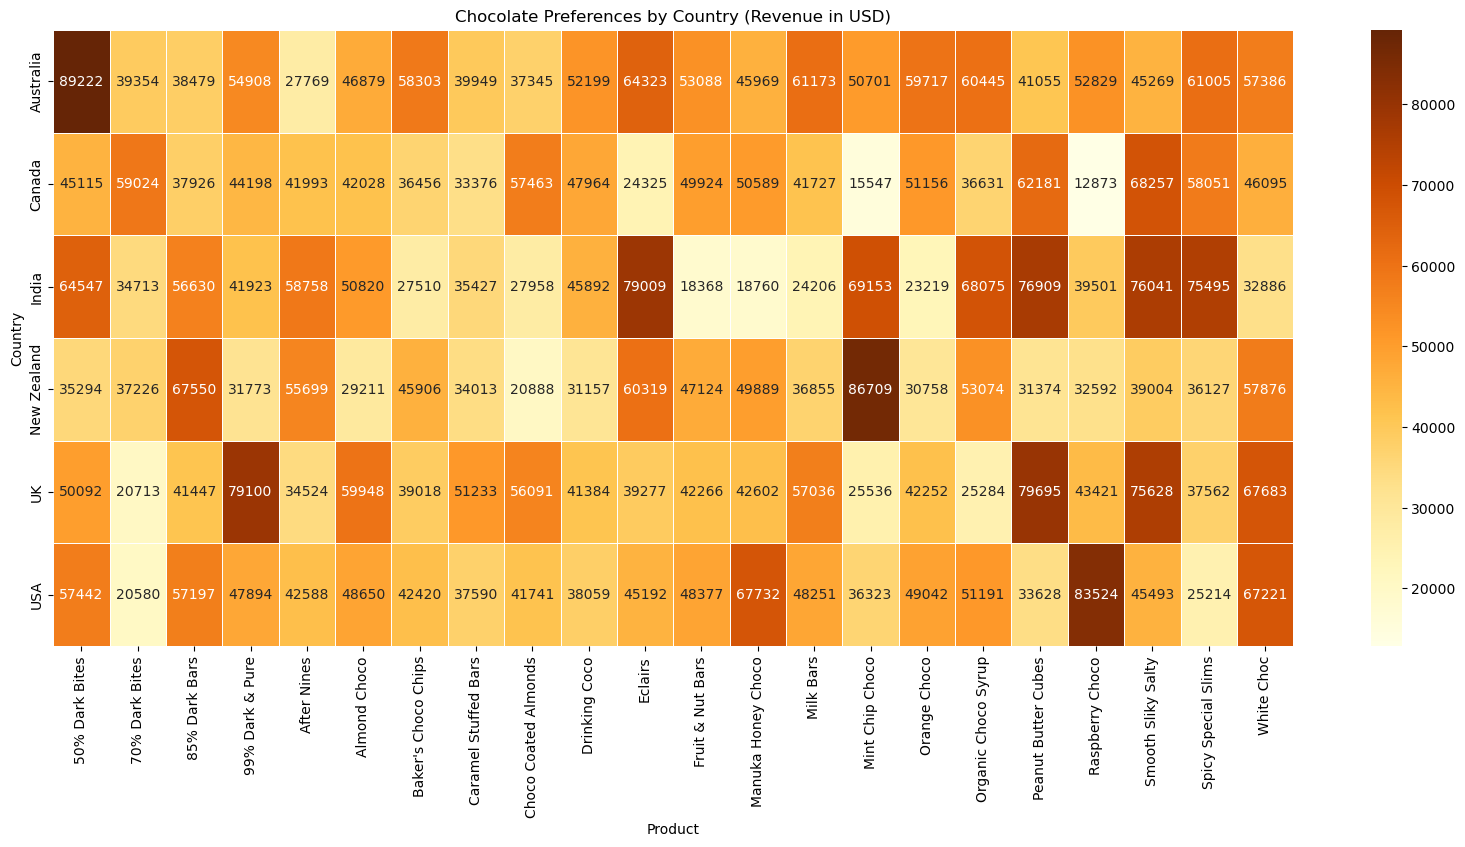

In [120]:
#  Group data: Total sales per product per country
product_by_country = df.groupby(['Country', 'Product'])['Amount'].sum().unstack()
plt.figure(figsize=(20, 8))
sns.heatmap( product_by_country, cmap="YlOrBr", annot=True, fmt=".0f", linewidths=0.5 )
plt.title("Chocolate Preferences by Country (Revenue in USD)")
plt.xlabel("Product")
plt.ylabel("Country")
plt.show()

In [125]:
# %% [markdown]
# **Is there a correlation between Price and Sales Volume?**
## Since there is no price column, we will infer the price by calculating the average price per box

#Findings: 

# Low price does not equal high revenue: 70% Dark Bites sells a lot but makes less money per unit than other chocolates. 
#I wonder if a small price increase could help?

# Premium products can defy price sensitivity: White Chocolate, mostly preferred in the USA and UK, is the most expensive type of chocolate,
#and it generates a good amount of revenue.
#White Chocolate sells well despite its high price. I’d love to analyze customer demographics to see if it’s popular among specific age groups

In [123]:
# Calculate key metrics
df['Price per Box'] = df['Amount'] / df['Boxes Shipped']

price_demand_table = df.groupby('Product').agg({'Price per Box': 'mean','Boxes Shipped': 'sum','Amount': 'sum'                  
}).sort_values('Boxes Shipped', ascending=False)

# Formating for readability
price_demand_table['Price per Box'] = price_demand_table['Price per Box'].round(2)
price_demand_table = price_demand_table.rename(columns={'Price per Box': 'Avg Price (USD)', 'Boxes Shipped': 'Total Units Sold','Amount': 'Total Revenue (USD)'
})

print(price_demand_table)

                      Avg Price (USD)  Total Units Sold  Total Revenue (USD)
Product                                                                     
50% Dark Bites                 111.75              9792             341712.0
Smooth Sliky Salty              88.73              8810             349692.0
Eclairs                        117.65              8757             312445.0
Caramel Stuffed Bars            74.60              8717             231588.0
Spicy Special Slims            119.89              8685             293454.0
Drinking Coco                   62.87              8660             256655.0
Milk Bars                       81.87              8330             269248.0
Peanut Butter Cubes             92.30              8304             324842.0
After Nines                     74.94              8257             261331.0
White Choc                     232.05              8240             329147.0
Mint Chip Choco                161.58              8207             283969.0